In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# # To configure GPU usage 
# from tensorflow import GPUOptions
# from tensorflow import ConfigProto
# from tensorflow import Session
# gpu_options = GPUOptions(per_process_gpu_memory_fraction=1)
# sess = Session(config=ConfigProto(gpu_options=gpu_options))

In [77]:
from livelossplot.tf_keras import PlotLossesCallback # to plot live plots
from tensorflow.keras.backend import clear_session # to clear keras session
from tensorflow.keras.models import Sequential, Model # to build sequential model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten # different keras layers
from tensorflow.keras.utils import to_categorical # to convert output to categorical
from tensorflow.keras.datasets import mnist # to load MNIST dataset
from tensorflow.keras.models import load_model # load keras model
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau # keras callbacks

In [4]:
MODELS_PATH = ".//Keras Models//"

In [97]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Digit: 4


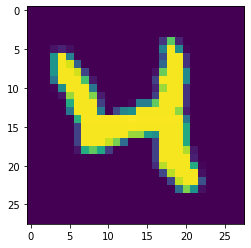

In [98]:
i = 20
print("Digit: %d"%Y_train[i])
plt.imshow(X_train[i])

In [99]:
# Reshape data
HEIGHT = X_train.shape[1]
WIDTH = X_train.shape[2]
NUM_CLASSES = len(np.unique(Y_train))

In [100]:
print("Number of data points in train set: %d"%X_train.shape[0])
print("Number of data points in test set: %d"%X_test.shape[0])
print("Height: %d and Width: %d"%(HEIGHT, WIDTH))
print("Unique number of digits: %d"%NUM_CLASSES)

Number of data points in train set: 60000
Number of data points in test set: 10000
Height: 28 and Width: 28
Unique number of digits: 10


In [101]:
def preprocess_data(data):
    data = data.reshape((data.shape[0], HEIGHT,WIDTH,1)) # flattening data
    return data / 255.0 # normalizing values

In [102]:
def generate_categories(data):
    # Categorically encode labels
    return to_categorical(data, NUM_CLASSES)

In [108]:
unique_labels, unique_label_indices = np.unique(Y_train, return_index=True)

In [109]:
X_train = preprocess_data(X_train)
Y_train = generate_categories(Y_train)

X_test = preprocess_data(X_test)
Y_test = generate_categories(Y_test) 

In [110]:
for i in unique_labels:
    print("Label value: %d, categorical value: %s"%(i, str(Y_train[unique_label_indices[i]])))
    

Label value: 0, categorical value: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label value: 1, categorical value: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Label value: 2, categorical value: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Label value: 3, categorical value: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Label value: 4, categorical value: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Label value: 5, categorical value: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Label value: 6, categorical value: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Label value: 7, categorical value: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Label value: 8, categorical value: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Label value: 9, categorical value: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [111]:
print("After preprocessing, input data shape: %s"%str(X_train.shape))
print("After generating categories, output data shape: %s"%str(Y_train.shape))

After preprocessing, input data shape: (60000, 28, 28, 1)
After generating categories, output data shape: (60000, 10)


In [35]:
BATCH_SIZE = 128
EPOCHS = 10

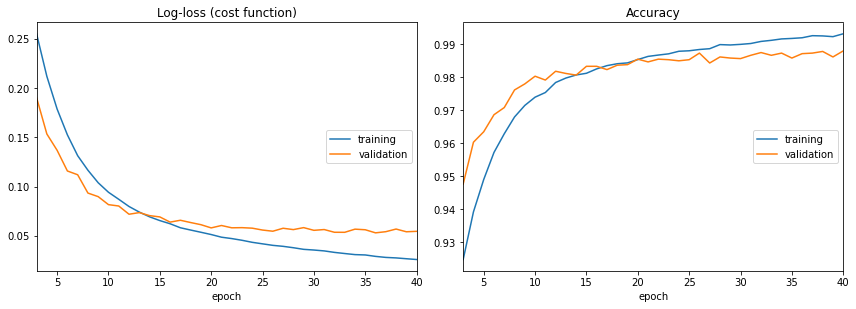

Log-loss (cost function):
training   (min:    0.026, max:    0.811, cur:    0.026)
validation (min:    0.053, max:    0.321, cur:    0.055)

Accuracy:
training   (min:    0.819, max:    0.993, cur:    0.993)
validation (min:    0.916, max:    0.988, cur:    0.988)
54000/54000 [==============================] - 9s 158us/sample - loss: 0.0259 - acc: 0.9932 - val_loss: 0.0545 - val_acc: 0.9880


In [38]:
# Build neural network
clear_session() # clear keras backend session
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(HEIGHT,WIDTH,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train model
plot_losses = PlotLossesCallback()
model.fit(x=X_train, y=Y_train, 
          callbacks=[plot_losses],
          batch_size=1000, 
          epochs=40, 
          validation_split=.1, 
          shuffle=True)

In [39]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0544339423691621
Test accuracy: 0.9833


In [40]:
MODEL_NAME = "MNIST_KERAS_CNN_MODEL"
model.save(MODELS_PATH+MODEL_NAME+".h5")

In [42]:
# model = load_model(MODELS_PATH+MODEL_NAME+".h5") # loading the keras model

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


# Understanding Early Stopping

In [44]:
# to stop model if val loss not decreasing
early_stopping = EarlyStopping(monitor='val_loss', 
                               min_delta=0.001, 
                               patience=5, 
                               verbose=1, 
                               mode='auto',
                               baseline=None, 
                               restore_best_weights=True)

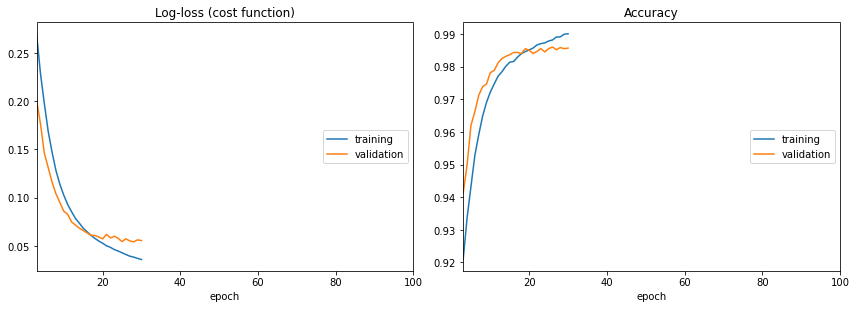

Log-loss (cost function):
training   (min:    0.036, max:    0.762, cur:    0.036)
validation (min:    0.054, max:    0.303, cur:    0.056)

Accuracy:
training   (min:    0.824, max:    0.990, cur:    0.990)
validation (min:    0.918, max:    0.986, cur:    0.986)
Restoring model weights from the end of the best epoch.
54000/54000 [==============================] - 8s 142us/sample - loss: 0.0360 - acc: 0.9901 - val_loss: 0.0556 - val_acc: 0.9857
Epoch 00030: early stopping


In [45]:
clear_session() # clear keras backend session
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(HEIGHT,WIDTH,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# to plot live loss plots
plot_losses = PlotLossesCallback()


# fitting the model
model_history = model.fit(x=X_train, y=Y_train, 
          callbacks=[plot_losses, early_stopping],
          batch_size=1000, 
          epochs=100, 
          verbose = 1,
          validation_split=.1,
          shuffle=True)

In [46]:
val_loss = model_history.history['val_loss']
for i in range(1,len(val_loss)):
#     print(" loss at iteration %d: %f"%(i, val_loss[i]))
    print(" loss drop at iteration %d: %f"%(i,val_loss[i-1]-val_loss[i]))
#     print()

 loss drop at iteration 1: 0.069078
 loss drop at iteration 2: 0.033251
 loss drop at iteration 3: 0.024474
 loss drop at iteration 4: 0.030702
 loss drop at iteration 5: 0.014868
 loss drop at iteration 6: 0.015048
 loss drop at iteration 7: 0.012142
 loss drop at iteration 8: 0.008897
 loss drop at iteration 9: 0.009016
 loss drop at iteration 10: 0.003227
 loss drop at iteration 11: 0.007795
 loss drop at iteration 12: 0.003314
 loss drop at iteration 13: 0.003135
 loss drop at iteration 14: 0.002540
 loss drop at iteration 15: 0.002413
 loss drop at iteration 16: 0.002569
 loss drop at iteration 17: 0.000073
 loss drop at iteration 18: 0.001570
 loss drop at iteration 19: 0.001974
 loss drop at iteration 20: -0.004628
 loss drop at iteration 21: 0.003689
 loss drop at iteration 22: -0.001784
 loss drop at iteration 23: 0.002128
 loss drop at iteration 24: 0.003397
 loss drop at iteration 25: -0.002848
 loss drop at iteration 26: 0.002219
 loss drop at iteration 27: 0.000927
 loss d

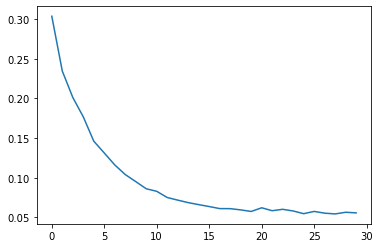

In [47]:
plt.plot(model_history.history['val_loss'])

In [48]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0572633275905624
Test accuracy: 0.9804


## Visualizing Output After Some Layer

In [112]:
layer_output = model.get_layer(index=1).output # setting layer from where we want to visualize the output
temp_model = Model(model.input, outputs=[layer_output])

result shape: (1, 13, 13, 32)
Actual Label 6


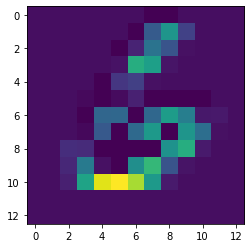

In [131]:
i = 13
result = temp_model.predict(X_train[i].reshape(1, HEIGHT, WIDTH,1)) # parsing input through pre-trained layers
print("result shape: %s"%str(result.shape))
print("Actual Label %s"%(list(Y_train[i]).index(1))) # getting actual label value from categorical values
plt.imshow((result[0][:,:,9]*255.).astype(int)) # regenerating image

# Understanding Learning Scheduler

In [134]:
# to stop model if val loss not decreasing
early_stopping = EarlyStopping(monitor='val_loss', 
                               min_delta=0.001, 
                               patience=5, 
                               verbose=1, 
                               mode='auto',
                               baseline=None, 
                               restore_best_weights=True)

In [135]:
# This function keeps the learning rate at 0.001 for the first ten epochs
# and decreases it exponentially after that.
def scheduler(epoch):
    EPOCHS = 10
    if epoch < EPOCHS:
        return 0.001
    else:
        return 0.001 * np.exp(0.1 * (EPOCHS - epoch))

lr_scheduler = LearningRateScheduler(scheduler, verbose=1)

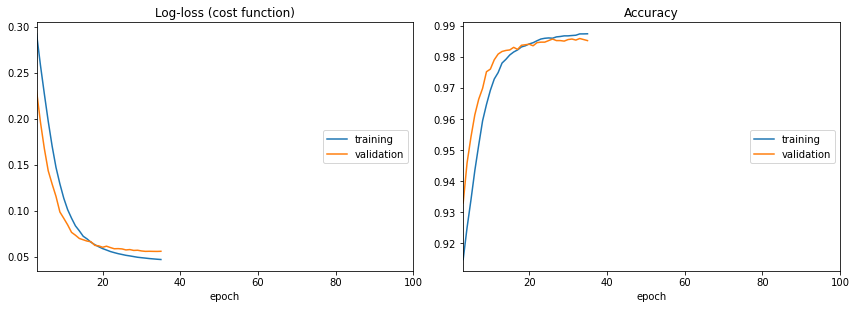

Log-loss (cost function):
training   (min:    0.047, max:    0.744, cur:    0.047)
validation (min:    0.056, max:    0.318, cur:    0.056)

Accuracy:
training   (min:    0.817, max:    0.987, cur:    0.987)
validation (min:    0.910, max:    0.986, cur:    0.985)
Restoring model weights from the end of the best epoch.
54000/54000 [==============================] - 8s 140us/sample - loss: 0.0469 - acc: 0.9874 - val_loss: 0.0559 - val_acc: 0.9852
Epoch 00035: early stopping


In [137]:
clear_session() # clear keras backend session
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(HEIGHT,WIDTH,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# to plot live loss plots
plot_losses = PlotLossesCallback()

# fitting the model
model_history = model.fit(x=X_train, y=Y_train, 
          callbacks=[plot_losses, lr_scheduler, early_stopping],
          batch_size=1000, 
          epochs=100, 
          verbose = 1,
          validation_split=.1,
          shuffle=True)

In [138]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06079781747087836
Test accuracy: 0.9801


In [139]:
val_loss = model_history.history['val_loss']
for i in range(1,len(val_loss)):
    #print(" loss at iteration %d: %f"%(i, val_loss[i]))
    print(" loss drop at iteration %d: %f"%(i,val_loss[i-1]-val_loss[i]))
    #print()

 loss drop at iteration 1: 0.058198
 loss drop at iteration 2: 0.029274
 loss drop at iteration 3: 0.033997
 loss drop at iteration 4: 0.028686
 loss drop at iteration 5: 0.024160
 loss drop at iteration 6: 0.014320
 loss drop at iteration 7: 0.013482
 loss drop at iteration 8: 0.016936
 loss drop at iteration 9: 0.006872
 loss drop at iteration 10: 0.007138
 loss drop at iteration 11: 0.008147
 loss drop at iteration 12: 0.003105
 loss drop at iteration 13: 0.003531
 loss drop at iteration 14: 0.001421
 loss drop at iteration 15: 0.001437
 loss drop at iteration 16: 0.000703
 loss drop at iteration 17: 0.003968
 loss drop at iteration 18: 0.000526
 loss drop at iteration 19: 0.001518
 loss drop at iteration 20: -0.001169
 loss drop at iteration 21: 0.001502
 loss drop at iteration 22: 0.001287
 loss drop at iteration 23: -0.000135
 loss drop at iteration 24: 0.000321
 loss drop at iteration 25: 0.001093
 loss drop at iteration 26: -0.000399
 loss drop at iteration 27: 0.000937
 loss d

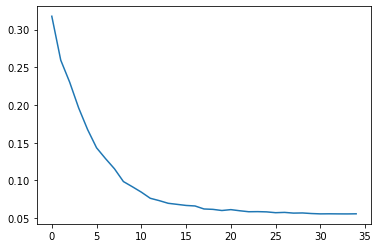

In [140]:
plt.plot(model_history.history['val_loss'])

# Understanding ReduceLROnPlateau

In [111]:
# to stop model if val loss not decreasing
early_stopping = EarlyStopping(monitor='val_loss', 
                               min_delta=0.0001, 
                               patience=10, 
                               verbose=1, 
                               mode='auto',
                               baseline=None, 
                               restore_best_weights=True)

In [117]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              min_delta = .01,
                              patience=5,
                              verbose=1,
                              min_lr=0.00001)

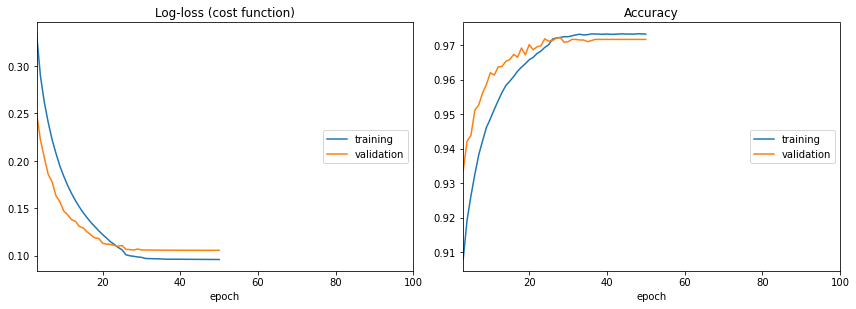

Log-loss (cost function):
training   (min:    0.096, max:    1.049, cur:    0.096)
validation (min:    0.106, max:    0.483, cur:    0.106)

Accuracy:
training   (min:    0.744, max:    0.973, cur:    0.973)
validation (min:    0.898, max:    0.972, cur:    0.972)
Restoring model weights from the end of the best epoch.
54000/54000 [==============================] - 2s 40us/sample - loss: 0.0961 - acc: 0.9732 - val_loss: 0.1058 - val_acc: 0.9717
Epoch 00050: early stopping


In [119]:
# Build neural network
clear_session() # clear keras backend session
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(HEIGHT*WIDTH, )))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

# to plot live loss plots
plot_losses = PlotLossesCallback()

# fitting the model
model_history = model.fit(x=X_train, y=Y_train, 
          callbacks=[plot_losses, reduce_lr, early_stopping],
          batch_size=1000, 
          epochs=100, 
          verbose = 1,
          validation_split=.1,
          shuffle=True)

In [120]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12777624480575323
Test accuracy: 0.9641


In [121]:
val_loss = model_history.history['val_loss']
for i in range(1,len(val_loss)):
    #print(" loss at iteration %d: %f"%(i, val_loss[i]))
    print(" loss drop at iteration %d: %f"%(i,val_loss[i-1]-val_loss[i]))
    #print()

 loss drop at iteration 1: 0.178508
 loss drop at iteration 2: 0.053628
 loss drop at iteration 3: 0.028441
 loss drop at iteration 4: 0.018827
 loss drop at iteration 5: 0.017473
 loss drop at iteration 6: 0.007838
 loss drop at iteration 7: 0.014738
 loss drop at iteration 8: 0.006190
 loss drop at iteration 9: 0.009824
 loss drop at iteration 10: 0.003843
 loss drop at iteration 11: 0.005266
 loss drop at iteration 12: 0.001604
 loss drop at iteration 13: 0.005439
 loss drop at iteration 14: 0.001557
 loss drop at iteration 15: 0.004216
 loss drop at iteration 16: 0.003112
 loss drop at iteration 17: 0.003245
 loss drop at iteration 18: 0.000572
 loss drop at iteration 19: 0.005036
 loss drop at iteration 20: 0.000962
 loss drop at iteration 21: 0.000203
 loss drop at iteration 22: 0.001121
 loss drop at iteration 23: 0.000922
 loss drop at iteration 24: -0.000915
 loss drop at iteration 25: 0.004141
 loss drop at iteration 26: 0.000250
 loss drop at iteration 27: 0.000484
 loss dro